# Rising Waters: Flood Prediction
This notebook contains the complete pipeline for data preprocessing, visualization, training, and evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn import metrics
from joblib import dump

## 1. Load Data

In [2]:
dataset = pd.read_excel("Dataset/flood dataset.xlsx")
dataset.head()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0


## 2. Visualizations

C:\Users\Admin\AppData\Local\Temp\ipykernel_30264\4172813959.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(dataset['Temp']))


Axes(0.125,0.11;0.775x0.77)


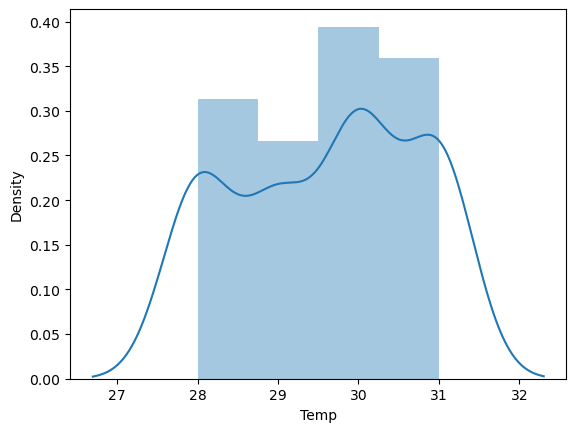

In [7]:
print(sns.distplot(dataset['Temp']))


Axes(0.125,0.11;0.775x0.77)


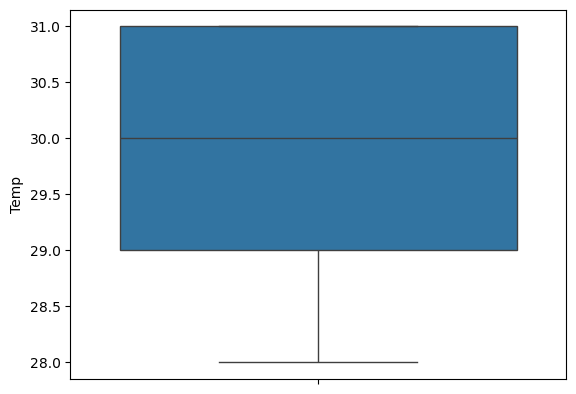

In [8]:
print(sns.boxplot(dataset['Temp']))

In [9]:
dataset.head()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0


In [10]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temp         115 non-null    int64  
 1   Humidity     115 non-null    int64  
 2   Cloud Cover  115 non-null    int64  
 3   ANNUAL       115 non-null    float64
 4   Jan-Feb      115 non-null    float64
 5   Mar-May      115 non-null    float64
 6   Jun-Sep      115 non-null    float64
 7   Oct-Dec      115 non-null    float64
 8   avgjune      115 non-null    float64
 9   sub          115 non-null    float64
 10  flood        115 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 10.0 KB
None


In [11]:
dataset.describe()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,29.600000,73.852174,36.286957,2925.487826,27.739130,377.253913,2022.840870,497.636522,218.100870,439.801739,0.139130
std,1.122341,2.947623,4.330158,422.112193,22.361032,151.091850,386.254397,129.860643,62.547597,210.438813,0.347597
min,28.000000,70.000000,30.000000,2068.800000,0.300000,89.900000,1104.300000,166.600000,65.600000,34.200000,0.000000
25%,29.000000,71.000000,32.500000,2627.900000,10.250000,276.750000,1768.850000,407.450000,179.666667,295.000000,0.000000
50%,30.000000,74.000000,36.000000,2937.500000,20.500000,342.000000,1948.700000,501.500000,211.033333,430.600000,0.000000
75%,31.000000,76.000000,40.000000,3164.100000,41.600000,442.300000,2242.900000,584.550000,263.833333,577.650000,0.000000
max,31.000000,79.000000,44.000000,4257.800000,98.100000,915.200000,3451.300000,823.300000,366.066667,982.700000,1.000000


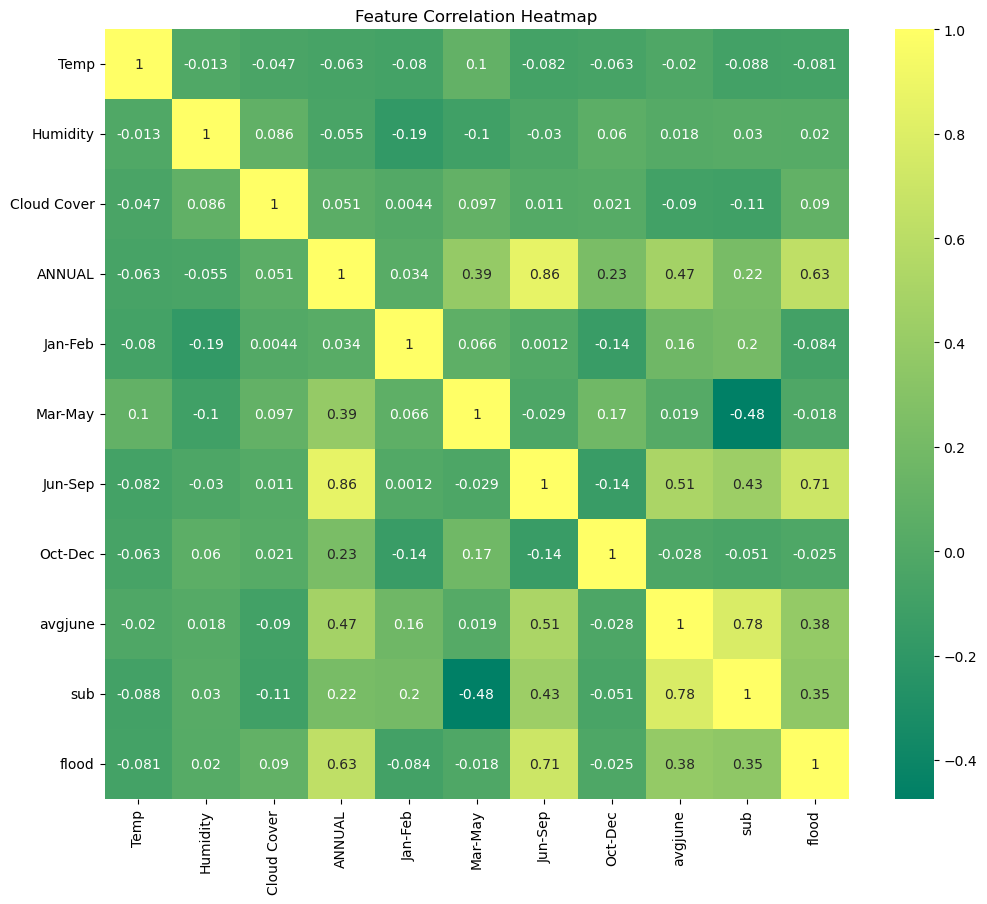

In [3]:
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(), annot=True, cmap="summer")
plt.title("Feature Correlation Heatmap")
plt.show()

## 3. Preprocessing

In [4]:
# Features: Cloud Cover, ANNUAL, Jan-Feb, Mar-May, Jun-Sep
x = dataset.iloc[:, 2:7].values
y = dataset.iloc[:, 10].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

dump(sc, "transform.save")

['transform.save']

## 4. Model Training (XGBoost)

In [5]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
dump(xgb, "floods.save")

['floods.save']

## 5. Performance Evaluation

In [6]:
y_pred = xgb.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

print("\nConfusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred))

Model Accuracy: 96.55%

Confusion Matrix:
[[26  0]
 [ 1  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.67      0.80         3

    accuracy                           0.97        29
   macro avg       0.98      0.83      0.89        29
weighted avg       0.97      0.97      0.96        29

